## Model of Lupus Nephritis
#### see paper: [here](https://tbiomed.biomedcentral.com/articles/10.1186/1742-4682-7-14)

In [15]:
import matplotlib.pyplot as plt
load('helpers.py') # has functions `investigate_stochastic()`, `investigate_fixed()` which we will use 

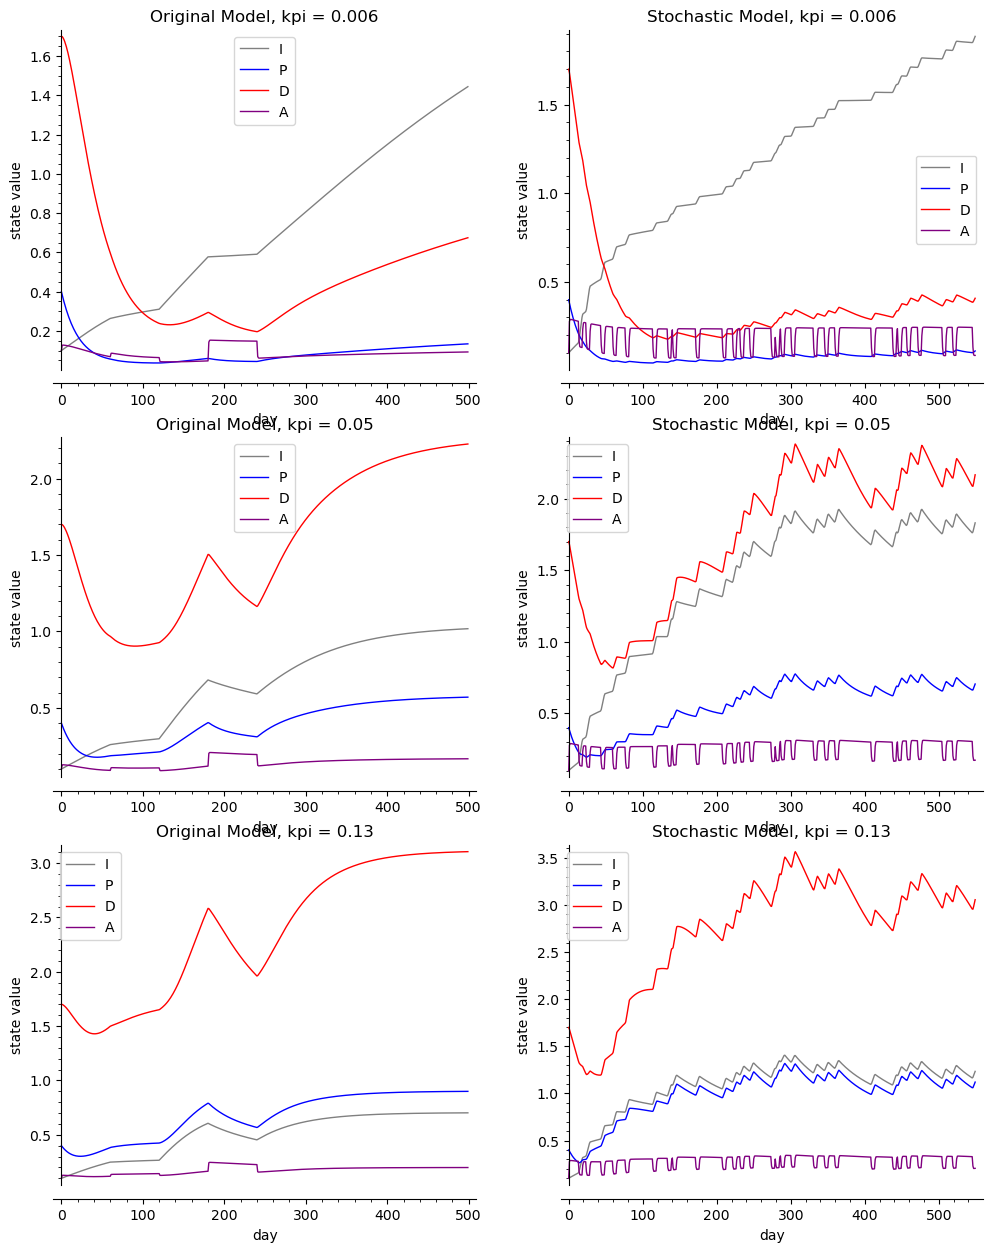

In [16]:
values_to_try_kpi = (0.006, 0.05, 0.13)
fig, ax = plt.subplots(3, 2, figsize = [12, 15])

for i, value in enumerate(values_to_try_kpi):
    investigate_stochastic(ax= ax[i,1], kpi = value)

for i, value in enumerate(values_to_try_kpi):
    investigate_fixed(ax= ax[i,0], kpi = value)

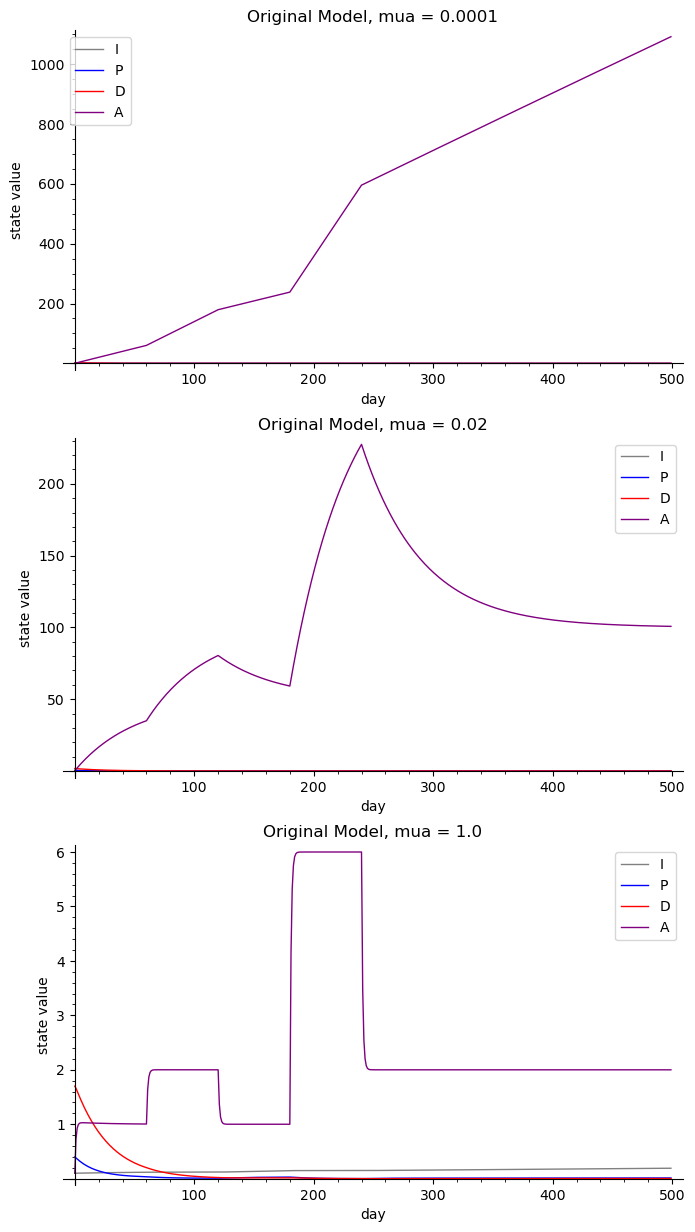

In [8]:
values_to_try_mua = (0.0001, 0.02, 1)
fig, ax = plt.subplots(3, 1, figsize = [8, 15])

for i, value in enumerate(values_to_try_mua):
    investigate_fixed(ax= ax[i], mua = value)